In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import imageio.v2 as imageio
import os
import pandas as pd

# Task 1

In [10]:
files_name = ["001.dat", "002.dat", "003.dat", "004.dat", "005.dat" ]

In [11]:
def read_file(file_name):
    x = []
    y = []
    try:
        with open(file_name, 'r') as f:
            numbers = int(f.readline())
            for i in range(numbers):
                points =[ float(j) for j in f.readline().split()]
                x.append(points[0])
                y.append(points[1])
            return x, y
    except Exception as e:
        print(0)
        return

In [30]:
def draw_plot(x, y, num):
    fig, ax = plt.subplots() 
    ax.scatter(x, y)
    plt.savefig(f"task1_plot_{num}")
    plt.show()
    

In [20]:
#implementation of 1 task
def first_task(_files_name):
    for i in range(len(_files_name)):
        x, y = read_file(_files_name[i])
        draw_plot(x,y, i)
    

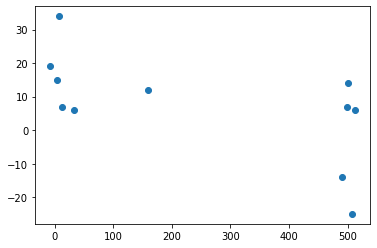

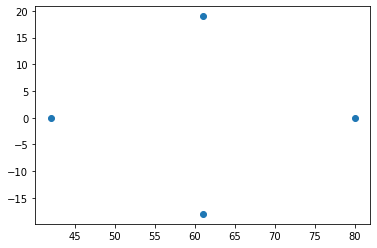

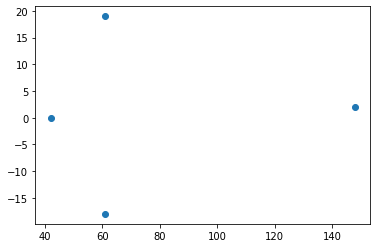

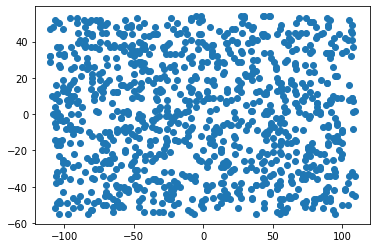

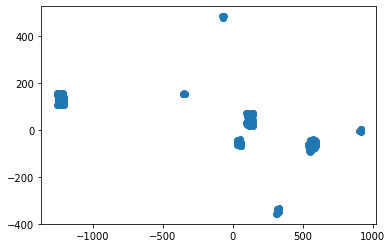

In [31]:
first_task(files_name)

# Task 2

In [2]:
file_name2 = "task2.dat"

In [3]:
def parse_coordinates(x, y):
    x = [float(i) for i in x]
    y = [float(i) for i in y]
    return x, y

In [4]:
def read_file2(file_name):
    X_list = []
    Y_list = []
    try:
        with open(file_name, 'r') as f:
            all_text = f.read().split('\n')
            #write x coordinates for all plot in X_list
            X_list = [all_text[i] for i in range(len(all_text)) if i % 2 == 0]
            #write y coordinates for all plot in Y_list
            Y_list = [all_text[i] for i in range(len(all_text)) if i % 2 == 1]
            return X_list, Y_list
    except Exception as e:
        print(0)
        return

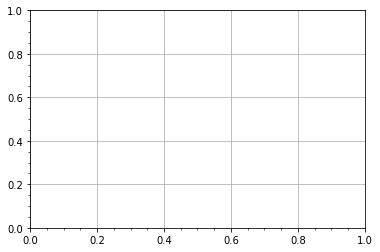

In [5]:
#global variables for gif
fig, ax = plt.subplots()
ax.grid(True)
ax.minorticks_on()
def draw_plot_for_gif(x, y):
    x, y = parse_coordinates(x, y)
    image = ax.scatter(x, y, animated = True)
    return image

In [6]:
def do_gif(_X_list, _Y_list):
    images_list = []
    for i in range(len(_X_list)-1):
        image = draw_plot_for_gif(_X_list[i].split(), _Y_list[i].split())
        images_list.append([image])
    #make gif from plots list
    ani = animation.ArtistAnimation(fig,images_list)
    ani.save('movie.gif')

In [57]:
def draw_plot_for_plots_list(x, y, ax, i):
    x, y = parse_coordinates(x, y)
    ax.grid(True)
    ax.minorticks_on()
    ax.scatter(x, y, animated = True)
    ax.set_title(i)

In [60]:
def do_set_of_plots(_X_list, _Y_list):
    fig, axs = plt.subplots(3, 2,figsize=(16, 22), sharex=True, sharey=True)
    i = 0 
    for ax in axs.flat:
        draw_plot_for_plots_list(_X_list[i].split(), _Y_list[i].split(), ax, i)
        i+=1
    #picture with all plots
    plt.savefig("plots_list ")
    plt.show()

In [7]:
X_list, Y_list = read_file2(file_name2)

do_gif(X_list, Y_list)

do_set_of_plots(X_list, Y_list)

do_set_of_plots(X_list, Y_list)

MovieWriter ffmpeg unavailable; using Pillow instead.


# Task 3

In [102]:
file_name3 = "students.csv"

In [101]:
def read_file3(file_name):
    Prep_list = []
    Group_list = []
    Mark_list = []
    try:
        with open(file_name, 'r') as f:
            line = f.readline()
            while line:
                in_line = line.split(';')
                Prep_list.append(in_line[0])
                Group_list.append(in_line[1])
                Mark_list.append(in_line[2])
                line = f.readline()
            f.close()
            return Prep_list, Group_list, Mark_list
    except Exception as e:
        f.close()
        print(0)
        return

In [174]:
def do_histogram(prep_nosame_list, data):
    fig, ax = plt.subplots(figsize = (20,15))
    colors = ["white", "red", "blue", "green", "grey", "orange", "pink", "purple", "yellow", "black"]
    ax.bar(prep_nosame_list, data[0], color = colors[0], label = "1")
    
    ax.bar(prep_nosame_list, data[1], color = colors[1], label = "2",
           bottom = data[0])
    
    ax.bar(prep_nosame_list, data[2], color = colors[2], label = "3",
           bottom = [sum(x) for x in zip(data[0],data[1])])
    
    ax.bar(prep_nosame_list, data[3], color = colors[3], label = "4",
           bottom = [sum(x) for x in zip(data[0],data[1], data[2])])
    
    ax.bar(prep_nosame_list, data[4], color = colors[4], label = "5",
           bottom = [sum(x) for x in zip(data[0],data[1], data[2], data[3])])
    
    ax.bar(prep_nosame_list, data[5], color = colors[5], label = "6",
           bottom = [sum(x) for x in zip(data[0],data[1], data[2], data[3], data[4])])
    
    ax.bar(prep_nosame_list, data[6], color = colors[6], label = "7",
           bottom = [sum(x) for x in zip(data[0],data[1], data[2], data[3], data[4], data[5])])
    
    ax.bar(prep_nosame_list, data[7], color = colors[7], label = "8",
           bottom = [sum(x) for x in zip(data[0],data[1], data[2], data[3], data[4], data[5], data[6])])
    
    ax.bar(prep_nosame_list, data[8], color = colors[8], label = "9",
        bottom = [sum(x) for x in zip(data[0],data[1], data[2], data[3], data[4], data[5], data[6], data[7])])
    
    ax.bar(prep_nosame_list, data[9], color = colors[9], label = "10",
        bottom = [sum(x) for x in zip(data[0],data[1], data[2], data[3], data[4], data[5], data[6], data[7], data[8])])
    plt.legend(  loc='upper right')
    plt.show()

In [172]:
def prepare_data_for_3_plot(_First_list, _Second_list):
    
    first =set(_First_list)
    #first list without repetition
    first_nosame_list = [i for i in first]
    # first list sorting
    first_nosame_list.sort(key = lambda t: int(t[-1]))
    number_of_students_mark = [0] * 10
    distribution_marks_as_first = [0] * len(first_nosame_list)
    
    for i in range(len(first_nosame_list)):
        number_of_students_mark = [0] * 10
        number_of_students_mark = np.array(number_of_students_mark)
        j=0
        while j < len(_First_list):
            if first_nosame_list[i] == _First_list[j]:
                number_of_students_mark[int(_Second_list[j])-1] += 1
            j+=1
        distribution_marks_as_first[i] = np.array(number_of_students_mark)
    distribution_marks_as_first = np.array(distribution_marks_as_first)
    distribution_marks_as_first = np.transpose(distribution_marks_as_first)
    return first_nosame_list, distribution_marks_as_first
    

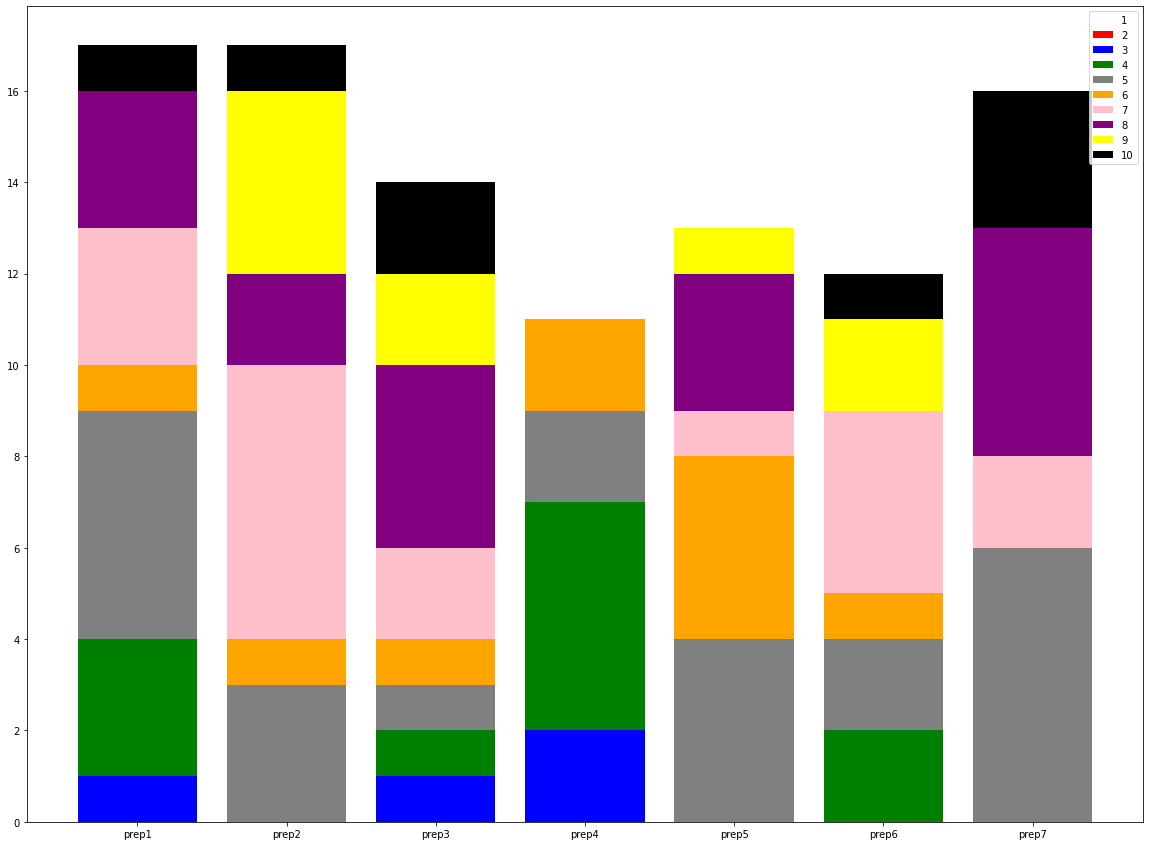

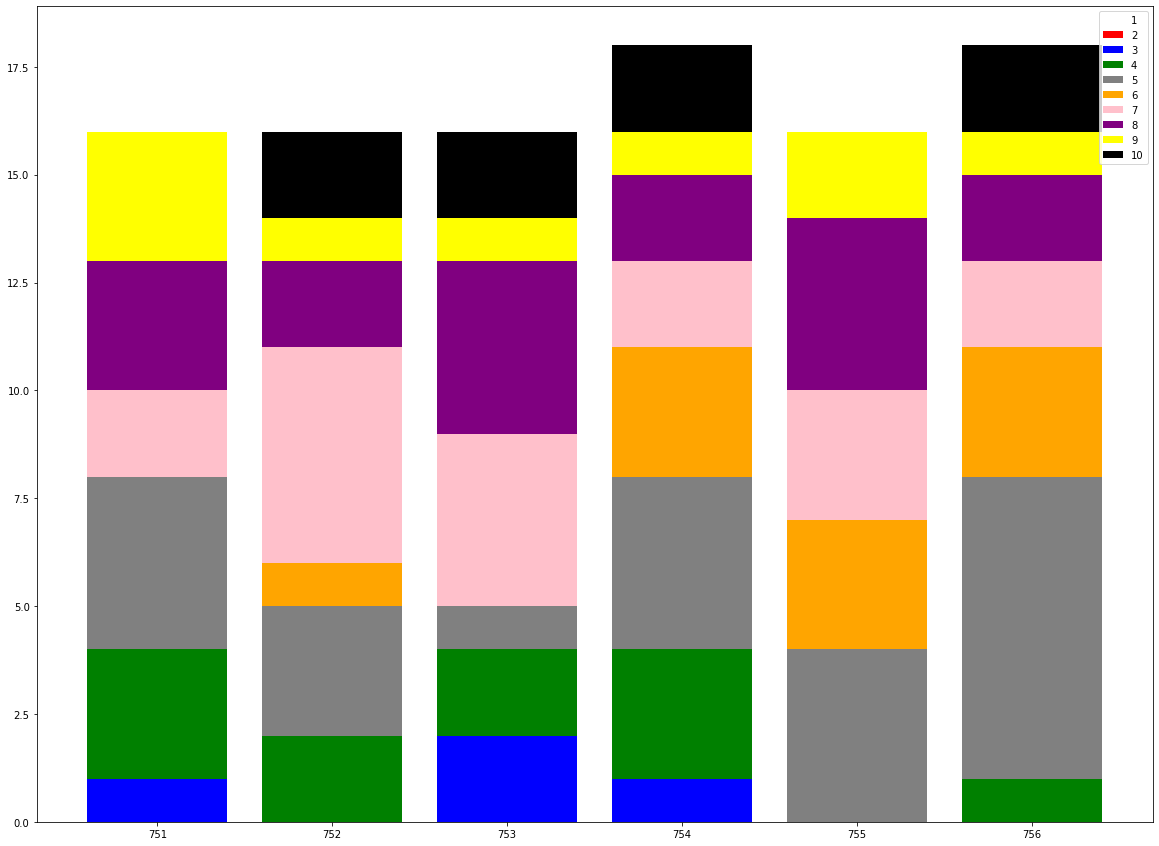

In [173]:
Prep_list, Group_list, Mark_list = read_file3(file_name)

nosame_list, distribution_marks_as_prep = prepare_data_for_3_plot(Prep_list, Mark_list)

do_histogram(nosame_list, distribution_marks_as_prep)

nosame_list, distribution_marks_as_group = prepare_data_for_3_plot(Group_list, Mark_list)

do_histogram(nosame_list, distribution_marks_as_group)
